Import ".wif" weaving file

In [16]:
filename = input('Name of .wif file: ') #44191, 44677, 34734, 53539, 13740, 13733

Name of .wif file: 44191.wif


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
with open(filename) as f:
    file = [line.rstrip('\n') for line in f]

Find contents of file (eg. color guide, tie-up, etc.)

In [18]:
category = []
cat_index = [];
categories = []
cat_indicies = []
for line in file:
    if line.startswith("["):
        category = line[1:-1]
        categories.append(category)
        cat_index = file.index(line)
        cat_indicies.append(cat_index)
#categories.append('end')
cat_indicies.append(len(file)+1)
print(categories)

['WIF', 'CONTENTS', 'WEAVING', 'COLOR PALETTE', 'COLOR TABLE', 'WARP', 'WEFT', 'TIEUP', 'THREADING', 'TREADLING', 'WARP COLORS', 'WEFT COLORS']


Find tie-up, threading, treadling

In [19]:
contents = []
for i in range(len(cat_indicies)-1):
    dictel = (categories[i],file[cat_indicies[i]+1:cat_indicies[i+1]])
    contents.append(dictel)
contents = dict(contents)
tieup_guide = contents['TIEUP']
threading_guide = contents['THREADING']
treadling_guide = contents['TREADLING']

Convert tie-up, threading, and treadling lists into draft matrices

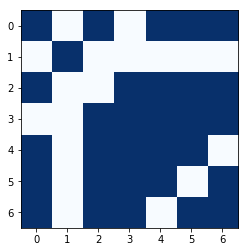

In [20]:
tieup_height=0
tieup_width = len(tieup_guide)
tieup = np.zeros((tieup_width,5*tieup_width))
for row in tieup_guide:
    row = row.split('=')
    trow = int(row[0])-1
    column = row[1].split(',')
    for index in column:
        tcol = int(index)
        tieup[trow][tcol-1] = 1
        tieup_height=max(tcol,tieup_height)
tieup = tieup[0:tieup_width,0:tieup_height]
#print(tieup)
tieup_display = np.transpose(tieup)
draft_tieup = plt.imshow(tieup_display,cmap='Blues');
plt.axis('image');

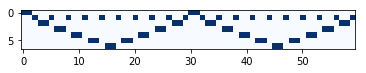

In [21]:
threading_width = len(threading_guide)
threading = np.zeros((threading_width,tieup_height))
for row in threading_guide:
    row = row.split('=')
    trow = int(row[0])-1
    tcol = int(row[1])-1
    threading[trow][tcol] = 1
threading_display=np.transpose(threading)
#print(np.shape(threading_display))
#print(threading_display)
draft_threading = plt.imshow(threading_display,cmap='Blues');
plt.axis('image');

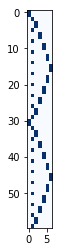

In [22]:
treadling_height = len(treadling_guide)
treadling = np.zeros((treadling_height,tieup_width))
for row in treadling_guide:
    row = row.split('=')
    trow = int(row[0])-1
    tcol = int(row[1])-1
    treadling[trow][tcol] = 1
#print(treadling)
draft_treadling = plt.imshow(treadling,cmap='Blues');
plt.axis('image');

Calculate draw-down, with black indicating warp on top of weft

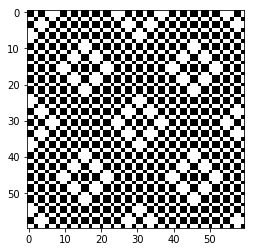

In [23]:
draw_down = np.matmul(treadling,(np.matmul(tieup,np.transpose(threading))))
draft_draw_down = plt.imshow(draw_down,cmap='Greys');
plt.axis('image');

Convert color guides lists to matrices

In [24]:
warp_colors_guide = contents['WARP COLORS']
warp_color = []
for row in warp_colors_guide:
    row = row.split('=')
    warp_color.append(int(row[1]))
#print(warp_color)

weft_colors_guide = contents['WEFT COLORS']
weft_color = []
for row in weft_colors_guide:
    row = row.split('=')
    weft_color.append(int(row[1]))
#print(weft_color)

In [25]:
color_map_array = []
if 'Form=RGB' in contents['COLOR PALETTE']:
    for element in contents['COLOR PALETTE']:
        if element.startswith('Range'):
            element = element.split('=')
            element = element[1].split(',')
            color_range_max = int(element[-1])
    for element in contents['COLOR TABLE']:
        element =  element.split('=')[1]
        element =  element.split(',')
        floats = [float(third)/color_range_max for third in element]
        color_map_array.append(floats)
        color_map = col.ListedColormap(color_map_array,'Palette')
else:
    color_map = 'Blues'

Draw-down colored with thread colors

In [26]:
warp_up_color = np.multiply(warp_color,draw_down)
down_draw_down = np.multiply(np.subtract(draw_down,1),-1)
weft_down_color = np.multiply(weft_color,np.transpose(down_draw_down))
draw_down_color = np.add(warp_up_color,np.transpose(weft_down_color))

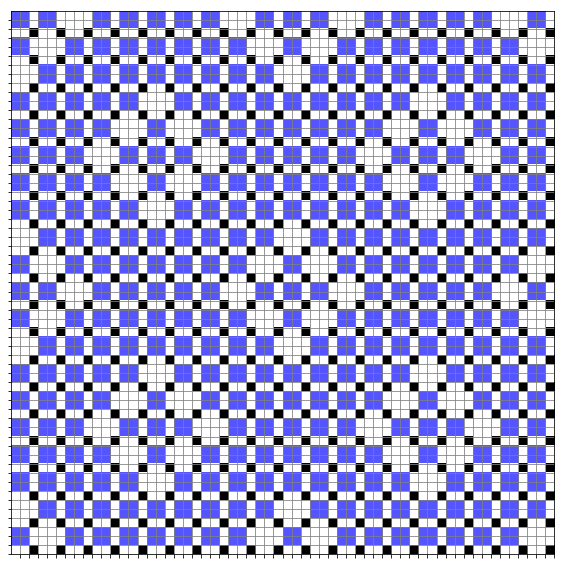

In [27]:
plt.figure(figsize=(10,10))
draw_down_image = plt.imshow(draw_down_color,cmap=color_map)
plt.axis('image')
plt.xticks(np.arange(0+.5,np.shape(draw_down)[0]+.5,1),[])
plt.yticks(np.arange(0+.5,np.shape(draw_down)[1]+.5,1),[])
plt.grid(color='gray');

<Figure size 432x288 with 0 Axes>

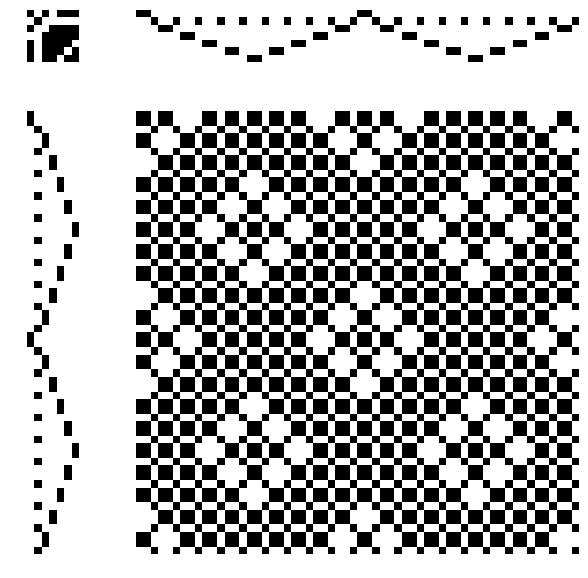

In [28]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
plt.figure(figsize=(10,10));

#draft_width = tieup_width + threading_width
#draft_height = tieup_height + treadling_height

widths = [tieup_width, threading_width]
heights = [tieup_height, treadling_height]

gs = gridspec.GridSpec(2, 2, width_ratios=widths, height_ratios=heights)

ax1 = plt.subplot(gs[0])
ax1.imshow(tieup_display,cmap='Greys')
ax1.axis('off')
ax2 = plt.subplot(gs[1])
ax2.imshow(threading_display,cmap='Greys')
ax2.axis('off')
ax3 = plt.subplot(gs[2])
ax3.imshow(treadling,cmap='Greys')
ax3.axis('off')
ax4 = plt.subplot(gs[3])
ax4.imshow(draw_down,cmap='Greys')
ax4.axis('off')

fig.subplots_adjust(hspace=0,wspace=0)

<Figure size 432x288 with 0 Axes>

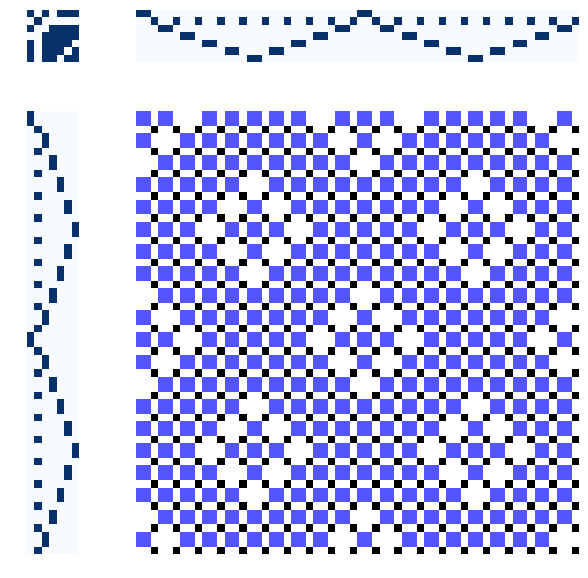

In [29]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
plt.figure(figsize=(10,10));

#draft_width = tieup_width + threading_width
#draft_height = tieup_height + treadling_height

widths = [tieup_width, threading_width]
heights = [tieup_height, treadling_height]

gs = gridspec.GridSpec(2, 2, width_ratios=widths, height_ratios=heights)

ax1 = plt.subplot(gs[0])
ax1.imshow(tieup_display,cmap='Blues')
ax1.axis('off')
ax2 = plt.subplot(gs[1])
ax2.imshow(threading_display,cmap='Blues')
ax2.axis('off')
ax3 = plt.subplot(gs[2])
ax3.imshow(treadling,cmap='Blues')
ax3.axis('off')
ax4 = plt.subplot(gs[3])
ax4.imshow(draw_down_color,cmap=color_map)
ax4.axis('off')

fig.subplots_adjust(hspace=.1,wspace=-.4)